## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [91]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [92]:
x_train.shape

(60000, 28, 28)

In [93]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [94]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [95]:
import pandas as pd
import numpy as np

In [96]:
pd.value_counts(y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [97]:
import tensorflow as tf

In [98]:
tensorflow.__version__

'2.4.1'

In [99]:
y_train = tf.keras.utils.to_categorical(y_train)


In [100]:
y_test = tf.keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [102]:
#set data type
#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')

x_train= x_train/255
x_test = x_test/255

In [103]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [104]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

x_test = x_test.reshape(x_test.shape[0],28,28,1)

### Import the necessary layers from keras to build the model

In [108]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [110]:
# Lets build model 
tf.keras.backend.clear_session()
#Initialise model
model = tf.keras.models.Sequential()
#1st convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#2nd convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#Flatten the output
model.add(tf.keras.layers.Flatten())
#fully connected layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

callback_list=[early_stopping]

#Train the model
model.fit(x_train,y_train,        
          validation_data=(x_test,y_test),
          epochs=30,
          batch_size=500)
         #callbacks=callback_list)

Epoch 1/30
120/120 [==============================] - 2s 17ms/step - loss: 1.9988 - accuracy: 0.2846 - val_loss: 42.0008 - val_accuracy: 0.6047
Epoch 2/30
120/120 [==============================] - 2s 16ms/step - loss: 0.7228 - accuracy: 0.7302 - val_loss: 40.5500 - val_accuracy: 0.6526
Epoch 3/30
120/120 [==============================] - 2s 16ms/step - loss: 0.6131 - accuracy: 0.7712 - val_loss: 44.5568 - val_accuracy: 0.6678
Epoch 4/30
120/120 [==============================] - 2s 16ms/step - loss: 0.5625 - accuracy: 0.7928 - val_loss: 40.2923 - val_accuracy: 0.6929
Epoch 5/30
120/120 [==============================] - 2s 16ms/step - loss: 0.5257 - accuracy: 0.8067 - val_loss: 41.7692 - val_accuracy: 0.7150
Epoch 6/30
120/120 [==============================] - 2s 16ms/step - loss: 0.5108 - accuracy: 0.8163 - val_loss: 46.9085 - val_accuracy: 0.7129
Epoch 7/30
120/120 [==============================] - 2s 16ms/step - loss: 0.4731 - accuracy: 0.8300 - val_loss: 38.7102 - val_accuracy:

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [111]:
# Lets build model again by adding max pool layer
tf.keras.backend.clear_session()
#Initialise model
model = tf.keras.models.Sequential()
#1st convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#2nd convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))

model.add(Dropout(0.25))

#Add max pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())
#fully connected layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list=[early_stopping]
#Train the model
model.fit(x_train,y_train,        
          validation_data=(x_test,y_test),
          epochs=30,
          batch_size=500)
         #callbacks=callback_list)

Epoch 1/30
120/120 [==============================] - 3s 19ms/step - loss: 1.9104 - accuracy: 0.3594 - val_loss: 83.6290 - val_accuracy: 0.6289
Epoch 2/30
120/120 [==============================] - 2s 17ms/step - loss: 0.7029 - accuracy: 0.7371 - val_loss: 72.0804 - val_accuracy: 0.6418
Epoch 3/30
120/120 [==============================] - 2s 17ms/step - loss: 0.6161 - accuracy: 0.7685 - val_loss: 66.0520 - val_accuracy: 0.6813
Epoch 4/30
120/120 [==============================] - 2s 17ms/step - loss: 0.5715 - accuracy: 0.7868 - val_loss: 59.9969 - val_accuracy: 0.6816
Epoch 5/30
120/120 [==============================] - 2s 17ms/step - loss: 0.5343 - accuracy: 0.8010 - val_loss: 64.6774 - val_accuracy: 0.6975
Epoch 6/30
120/120 [==============================] - 2s 17ms/step - loss: 0.5160 - accuracy: 0.8124 - val_loss: 57.8431 - val_accuracy: 0.7155
Epoch 7/30
120/120 [==============================] - 2s 17ms/step - loss: 0.4868 - accuracy: 0.8232 - val_loss: 62.8951 - val_accuracy:

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [112]:
from keras.preprocessing.image import ImageDataGenerator

In [113]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

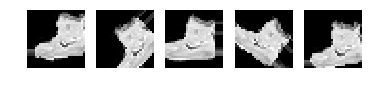

In [ ]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [114]:
# Lets build model again by adding max pool layer
tf.keras.backend.clear_session()
#Initialise model
model = tf.keras.models.Sequential()
#1st convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#2nd convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))

model.add(Dropout(0.25))

#Add max pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())
#fully connected layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list=[early_stopping]
#Train the model
model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),steps_per_epoch=x_train.shape[0]/32,                                         
          validation_data=(x_test,y_test),
          epochs=30)
         #callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1875/1875 [==============================] - 18s 9ms/step - loss: 1.5831 - accuracy: 0.4181 - val_loss: 53.3875 - val_accuracy: 0.5452
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9864 - accuracy: 0.6351 - val_loss: 59.2781 - val_accuracy: 0.4972
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8748 - accuracy: 0.6729 - val_loss: 89.7036 - val_accuracy: 0.4672
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8348 - accuracy: 0.6842 - val_loss: 154.1621 - val_accuracy: 0.3426
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8033 - accuracy: 0.6972 - val_loss: 202.5954 - val_accuracy: 0.3535
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7820 - accuracy: 0.7046 - val_loss: 278.7164 - val_accuracy: 0.2642
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7724 - accuracy: 0.7082 - val_loss: 294.72

###  Report the final train and validation accuracy

In [119]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 108.6455 - accuracy: 0.5385
[108.64553833007812, 0.5385000109672546]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [127]:
from keras.datasets import cifar10
(x_train11, y_train11), (x_test11, y_test11) = cifar10.load_data()

In [128]:
x_train11.shape

(50000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [129]:
gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train11)

### **Prepare/fit the generator.**

In [130]:

x_train11  = x_train11.astype('float32')
x_test11 = x_test11.astype('float32')

x_train11/=255
x_test11 /=255

x_train11 = x_train11.reshape(x_train11.shape[0],32,32,3)

x_test11 = x_test11.reshape(x_test11.shape[0],32,32,3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

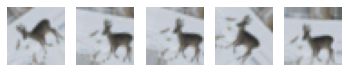

In [136]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train11[20:21], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()